![](images_notes/Picture1.png)

## Residential Outdoor and Landscaping Water Use

## Evaporation from swimming pools

<br>
Let's import our datafile california.csv and water_bodies.csv which contains CA evotranspiration rate and evoporation rates.

* zip_code : CA zip code number
* zone : CA zone
* Water bodies zones for pan evo
* latitude : decimal degree
* longitude : decimal degree
* date : months 
* eto : evotranspiration meters per day (m/day)
* evo : evaporation rate inches 

In [1]:
CU = 0.6233

In [2]:
%matplotlib inline
import math
import webbrowser as wb
import matplotlib.pyplot as plt
import pandas as pd
from fpdf import FPDF

In [3]:
cdp = pd.read_csv('./california.csv')
cdp = cdp.set_index('zip_code')
cdp.head()

,zone,Latitude,Longitude,month,p50,temp_mean,dtr,ref_humid,sunshine,wind_run,eto
zip_code,,,,,,,,,,,
90001,Firestone Park Los Angeles County,33.963094,-118.232598,Jan,49.55,14.0,11.0,64.0,70.0,2.9,2.27
90001,Firestone Park Los Angeles County,33.963094,-118.232598,Feb,41.08,14.8,10.6,67.0,71.0,3.3,2.74
90001,Firestone Park Los Angeles County,33.963094,-118.232598,Mar,37.38,15.2,9.7,69.0,71.0,3.7,3.29
90001,Firestone Park Los Angeles County,33.963094,-118.232598,Apr,13.68,16.7,9.9,67.0,77.0,3.9,4.22
90001,Firestone Park Los Angeles County,33.963094,-118.232598,May,0.80,18.1,8.7,70.0,65.0,3.8,4.35


In [4]:
pld = pd.read_csv('./water_bodies.csv')
pld = pld.set_index('zip')
pld.head()

,water_bodies,Latitude,Longitude,month,pan_evo
zip,,,,,
94561,"Antioch Pump Plant 3, California",38.004921,-121.805789,Jan,1.17
94561,"Antioch Pump Plant 3, California",38.004921,-121.805789,Feb,1.99
94561,"Antioch Pump Plant 3, California",38.004921,-121.805789,Mar,4.25
94561,"Antioch Pump Plant 3, California",38.004921,-121.805789,Apr,6.27
94561,"Antioch Pump Plant 3, California",38.004921,-121.805789,May,8.96


In [5]:
while True:
    user_z = int(input("Enter a valid California zipcode: "))
    if user_z in cdp.index:
        print(f"{user_z} is a valid CA zipcode")
        break
    else:
        print("This code is not in our registry try with another ")

Enter a valid California zipcode: 94305
94305 is a valid CA zipcode


In [6]:
user_zip = user_z
#Delimitating the DF to the one from user zip code
cdp = cdp.loc[user_zip]
#cdp
locations = set(cdp['zone'])
locations

{'Palo Alto Santa Clara County', 'Stanford Santa Clara County'}

In [7]:
shape_of_the_pool = str(input("Enter the shape of the pool S for square, C for circle or O for Oblong : "))
shapes = ["s","c", "o"]

if shape_of_the_pool == shapes[0]:
    pool_x = int(input("Enter the longitude of the pool in ft: "))
    pool_y = int(input("Enter the wide of the pool in ft: "))
    area = round((pool_x*pool_y),3)
elif shape_of_the_pool == shapes[1]:
    pool_d = int(input("Enter the diameter of the pool is ft : "))
    area = round((math.pi*(pool_d/2)**2),3)
elif shape_of_the_pool == shapes[2]:
    pool_a = int(input("Enter the larger diameter in ft: "))
    pool_b = int(input("Enter the smaller diameter in ft: "))
    pool_l = int(input("Enter the longitude of the pool in ft : "))
    area = round(((pool_a+pool_b)*pool_l*0.45),3)
print(f"\nThe area of the pool is {area} square ft")

Enter the shape of the pool S for square, C for circle or O for Oblong : s
Enter the longitude of the pool in ft: 164
Enter the wide of the pool in ft: 76

The area of the pool is 12464 square ft


In [8]:
#searching for the nearst zipcode in our water bodies registers.
given_value = user_z
a_list = pld.index
absolute_difference_function = lambda list_value : abs(list_value- given_value)
closest_value = min(a_list, key=absolute_difference_function)
user_w = closest_value
pld = pld.loc[user_w]

In [9]:
zo = set(pld['water_bodies'])
zo

{'Tracy Pumping Plant, California'}

In [10]:
evo_year = pld[['month','pan_evo']].copy().iloc[0:12]
#printing eto values and the month 

evo_year.reset_index(inplace=True)
evo_year.set_index('month', inplace=True)

evo_year = evo_year['pan_evo']

evo_year

month
Jan     1.53
Feb     2.47
Mar     5.30
Apr     8.20
May    12.01
Jun    14.88
Jul    16.92
Aug    14.55
Sep    10.64
Oct     6.57
Nov     2.93
Dec     1.48
Name: pan_evo, dtype: float64

In [11]:
d_evo_year = evo_year.to_dict()
#creating list to store the values of interest 
lst_month = []
lst_evo = []
convert_evo_anual =[]


for k,v in d_evo_year.items():
    lst_month.append(k)
    lst_evo.append(v)
    convert_evo_anual.append(round((0.0833333*v),3))


max_evo = max(lst_evo)
pos_evo = lst_evo.index(max_evo)

print(max_evo, lst_month[pos_evo])
print(convert_evo_anual)

16.92 Jul
[0.127, 0.206, 0.442, 0.683, 1.001, 1.24, 1.41, 1.212, 0.887, 0.547, 0.244, 0.123]


In [12]:
print(f"Max value of evaporation rate : {max_evo} inches for the month {lst_month[pos_evo]}")

Max value of evaporation rate : 16.92 inches for the month Jul


In [13]:
sum_areap_evo = 0
areap_evo = [round((area*v),3) for v in convert_evo_anual]
sum_areap_evo= round(sum(areap_evo),3)
print(f"Anual evaporation rate {sum_areap_evo} in ft")
year_water_lost = round(sum_areap_evo*7.48052*0.0020,3)


Anual evaporation rate 101232.608 in ft


In [14]:
print( f"{round(max(convert_evo_anual)*area*7.48052,3)} gallons is the amount of water evaporated from the pool for the peak month {lst_month[pos_evo]} in CA,")
print(*locations, sep = " and ")

131464.454 gallons is the amount of water evaporated from the pool for the peak month Jul in CA,
Stanford Santa Clara County and Palo Alto Santa Clara County


In [15]:
print( f"{round(sum_areap_evo*7.48052,3)}  gallons/year is is the amount of water evaporated from the pool in CA,")
print(*locations, sep = " and ")

757272.549  gallons/year is is the amount of water evaporated from the pool in CA,
Stanford Santa Clara County and Palo Alto Santa Clara County


## Evaporation from lawns

In [16]:
"""Calculate the evotranspiration rate from laws monthly and annually for the user 
zip code and the area equivalent to the pool area to compare the amount of water lost
due to evaporation on an uncovered pool surface and that of a lawn"""

'Calculate the evotranspiration rate from laws monthly and annually for the user \nzip code and the area equivalent to the pool area to compare the amount of water lost\ndue to evaporation on an uncovered pool surface and that of a lawn'

In [17]:
# ETO values by year
eto_year = cdp[['month','eto']].copy().iloc[0:12]

eto_year.reset_index(inplace=True)
eto_year.set_index('month', inplace=True)

eto_year = eto_year['eto']

eto_year

month
Jan    1.16
Feb    1.76
Mar    2.69
Apr    4.15
May    5.77
Jun    7.54
Jul    7.46
Aug    6.43
Sep    5.08
Oct    3.34
Nov    1.85
Dec    1.15
Name: eto, dtype: float64

In [18]:
d_eto_year = eto_year.to_dict()
#Creating list to store the values
l_month = []
l_eto = []
convert_eto_anual =[]

for k,v in d_eto_year.items():
    l_month.append(k)
    l_eto.append(v)
    convert_eto_anual.append(round((v*0.0393701*30.4167),3))


max_eto = max(l_eto)
pos_eto = l_eto.index(max_eto)

print(max_eto, l_month[pos_eto])
print(convert_eto_anual)

7.54 Jun
[1.389, 2.108, 3.221, 4.97, 6.91, 9.029, 8.933, 7.7, 6.083, 4.0, 2.215, 1.377]


In [19]:
print(f"Max value of Evotranspiration: {max(convert_eto_anual)} inches/month for the month {l_month[pos_eto]}")

Max value of Evotranspiration: 9.029 inches/month for the month Jun


In [20]:
sum_area_py = 0
area_py = [round((area*CU*0.70*v),3) for v in convert_eto_anual]
sum_area_py= round(sum(area_py),3)

In [21]:
print( f"{max(area_py)} gallons/month is the landscape allowance water for the peak month {l_month[pos_eto]} in California,")
print(*locations, sep = " and ")

49101.217 gallons/month is the landscape allowance water for the peak month Jun in California,
Stanford Santa Clara County and Palo Alto Santa Clara County


In [22]:
print( f"{sum_area_py}  gallons/year is the annually landscape allowance water in California,")
print(*locations, sep = " and ")

315060.253  gallons/year is the annually landscape allowance water in California,
Stanford Santa Clara County and Palo Alto Santa Clara County


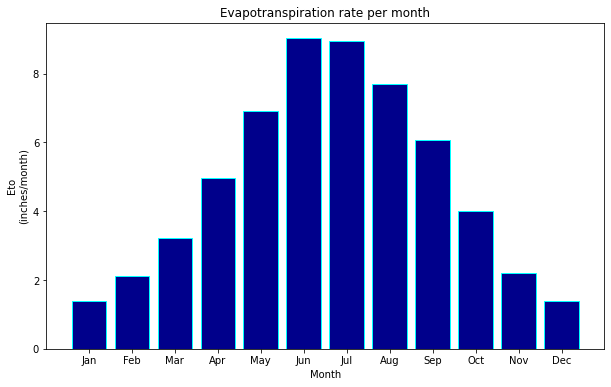

In [23]:
# Define plot space
fig, ax = plt.subplots(figsize=(10, 6))
# Define x and y axes
ax.bar(l_month, convert_eto_anual, color = 'darkblue', 
        edgecolor = 'cyan')
plt.xlabel('Month')
plt.ylabel('Eto\n(inches/month)')
plt.title('Evapotranspiration rate per month')
plt.savefig("pie.png")
plt.show()

In [24]:
pdf = FPDF()
pdf = FPDF(orientation='P', unit='mm', format='A4')

#header of the pdf file
pdf.add_page()
pdf.set_font('Arial', 'B', 16)
pdf.image("images_notes/cat.jpg", x = 10, y = None, w = 190, h = 50, type = '', link = '')
pdf.ln(10)
#pdf.add_font('sysfont', '', r"c:\WINDOWS\Fonts\HelveticaNeue.ttf", uni=True)
pdf.add_font('rale_m', '', 'font/Raleway-Medium_0.ttf', uni=True)
pdf.add_font('rale', '', 'font/Raleway-MediumItalic.ttf', uni=True)
pdf.add_font('ralebi', '', 'font/Raleway-Bold_0.ttf', uni=True)
pdf.set_font('ralebi', '', 14)
pdf.cell(0, 6, f"Residential Outdoors and Landscaping water use",ln=1)
pdf.cell(0, 6, ln=1)
pdf.set_font('ralebi', '', 11)
pdf.multi_cell(0, 5, "By 2005 the outdoors water consumption for most of the regions at United States reached between 50-70% of the total residential use. During the months of Jun to Ago the evaporation rates peaks due to the fact that mean temperature rise in the summer. Since water evaporates quickly, the water evaporated from water bodies increase also. More water evaporates from the lawns this means that irrigation system increase during summer months, by this period the water delivery system operates to full capacity, therefore is important to elaborate water conservation programs.")
#pdf.cell(0, 6, f' Max value of Evotranspiration: {max(convert_eto_anual)} inches/month for the month {l_month[pos_eto]}', 0, 1, 'L', 1)
pdf.cell(0, 6, ln=1)
pdf.set_font('ralebi', '', 12)
pdf.cell(0, 6, f"Evaporation from swimming pools",ln=1)
pdf.cell(0, 6, ln=1)
pdf.set_font('rale', '', 11)
if shape_of_the_pool == shapes[0]:
    pdf.cell(0, 6,f"the longitude of the pool of rectangular shape is {pool_x} ft",ln=1)
    pdf.cell(0, 6,f"the wide of the pool of rectangular shape is {pool_x} ft",ln=1)
elif shape_of_the_pool == shapes[1]:
     pdf.cell(0, 6,f"the diameter of the pool of circular shape is {pool_x} ft",ln=1)
elif shape_of_the_pool == shapes[2]:
    pdf.cell(0, 6, f"the larger diameter of the pool of  Oblong shape is {pool_a} ft",ln=1)
    pdf.cell(0,6 , f"the smaller diameter of the pool of Oblong shape is {pool_b} ft",ln=1)
    pdf.cell(0,6 , f"the longitude of the pool of Oblong shape is {pool_l} ft",ln=1)
pdf.cell(0, 6, f"the surface area calculated is approximately {area} ft" , ln=1)
pdf.cell(0, 6, ln=1)
pdf.multi_cell(0,5 ,f"To estimate the amount of water that evaporate from a pool, we need to calculate first the surface area of the pool,then we need to determine the evaporation rate and multiply that value for the area of the pool to finally obtain the volume of water that evaporate from the uncovered surface in square ft.")
pdf.cell(0, 6, f"Values of evoporation rates for the zipcode {user_zip} was taken from the closest body of water in this case: ",  ln=1)
pdf.cell(0, 6, " and ".join(str(e) for e in zo),  ln=1)
pdf.cell(0, 6, ln=1)
pdf.set_font('ralebi', '', 11)
pdf.cell(0, 6, f"Determining the amount of water that evaporate during the peak month", ln=1)
pdf.set_font('rale', '', 11)
pdf.cell(0, 6, f"{round(max(convert_evo_anual)*area*7.48052,3)} gallons is the amount of water evaporated from the pool for the peak month {lst_month[pos_evo]} in California",ln=1)
pdf.cell(0, 6, ln=1)
pdf.set_font('ralebi', '', 11)
pdf.cell(0, 6, f"Determining the amount of water that evaporate during the whole year", ln=1)
pdf.set_font('rale', '', 11)
pdf.cell(0, 6,  f"{round(sum_areap_evo*7.48052,3)}  gallons/year is is the amount of water evaporated annually from the pool in California", ln=1)
pdf.cell(0, 6, ln=1)
pdf.set_font('ralebi', '', 12)
pdf.cell(0, 6, f"Evaporation from Lawns",ln=1)
pdf.cell(0, 6, ln=1)
pdf.set_font('rale', '', 11)
pdf.multi_cell(0,5 ,f"We need to calculate the evotranspiration rate from laws monthly and annually for the user zip code and the area equivalent to the pool area to compare the amount of water lost due to evaporation on an uncovered pool surface and that of a lawn")
pdf.cell(0, 6, ln=1)
pdf.set_font('ralebi', '', 11)
pdf.cell(0, 6, f"Determining  the amount of water  needed for the lawn in the peak month", ln=1)
pdf.set_font('rale', '', 11)
pdf.cell(0, 6, f"{max(area_py)} gallons/month is the landscape allowance water for the peak month {l_month[pos_eto]} in California at:",ln=1)
pdf.cell(0,6, " and ".join(str(e) for e in locations) ,ln=1)
pdf.cell(0, 6, ln=1)
pdf.set_font('ralebi', '', 11)
pdf.cell(0, 6, f"Determining  the amount of water per year  needed for the lawn" , ln=1)
pdf.set_font('rale', '', 11)
pdf.cell(0, 6, f"{sum_area_py}  gallons/year is the annually landscape allowance water in California, at:", ln=1)
pdf.cell(0,6, " and ".join(str(e) for e in locations) ,ln=1)
pdf.cell(0, 6, ln=1)
#pdf.set_fill_color(200, 220, 255)
pdf.cell(0, 6, ln=1)
pdf.image("pie.png", x = None, y = None, w = 150, h = 100, type = '', link = '')
pdf.cell(0, 6, ln=1)
pdf.set_font('rale', '', 11)
pdf.multi_cell(0, 5,f"In the barchar above we can notice that the peak month for evotranspiration rate is the month of {l_month[pos_eto]}, which one is close to the summer months.When we compare the pool annually water lost with the water lost from the lawns for the same area in this case {area} square ft, we realize that the amount of water that evaporate from the pool is is significantly higher than the one from the laws some recomendation are to buy a  plastic cover for your pool the amount of money lost due water evaporation  from the pool is aproximatelly {year_water_lost} $.")

pdf.set_y(-30) #30 CM from the bottom of the page
pdf.set_font('Arial', '', 8)
pdf.set_text_color(0)


pdf.output('water_report.pdf', 'F')

''

In [25]:
wb.open_new("water_report.pdf")

True